# Agricultural Raw Material prices (1990-2020)

This dataset comprises of prices and price % change for coarse wool, copra, cotton, fine wool, hardlog, hard sawnwood, hide, plywood, rubber, softlog, soft sawnwood and wood pulp.


Agriculture materials
madeira algodão, etc, materias primas iniciais.
utilizar os dados para gerar alguns insights.


## 1 . Importar e ler aquivos

In [ ]:
# importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# carregando os dados
dados = pd.read_csv("agricultural_raw_material.csv")
dados

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.00,0.00%
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.00,0.00%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.00,0.00%
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,...,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.00,0.00%


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [ ]:
# verificando dados nulos
dados.isnull().sum().sort_values(ascending=False)

Hard sawnwood price % Change    34
Softlog Price                   34
Coarse wool price % Change      34
Soft sawnwood price % Change    34
Fine wool Price                 34
Fine wool price % Change        34
Soft sawnwood Price             34
Softlog price % Change          34
Hard sawnwood Price             34
Coarse wool Price               34
Hide Price                      34
Hide price % change             34
Copra Price                     22
Copra price % Change            22
Wood pulp Price                  1
Wood pulp price % Change         1
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Plywood Price                    0
Hard log price % Change          0
Hard log Price                   0
Cotton price % Change            0
Cotton Price                     0
Month                            0
dtype: int64

In [ ]:
dados.shape

(361, 25)

## Tratamento de Dados


In [ ]:
# Definindo a função para limpar os dados
def limpar_dados(dados):

  # Substituir por uma string vazia '
  dados = dados.replace(["%", ",", "-"], "", regex=True)

  # Substituir valores vazios por NaN
  dados = dados.replace("", np.nan)
  return dados

# Aplicar a função aos seus dados
dados = limpar_dados(dados)

In [ ]:
# Excluindo linhas vazias NaN
dados = dados.dropna()

In [ ]:
# verificando se ainda há valores vazios
dados.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [ ]:
# Convertendo o tipo de dados para float

# Lista de colunas a serem convertidas para float
colunas = [col for col in dados.columns if col != "Month" and dados[col].dtype == "object"]

# Convertendo o tipo de dados para float apenas nas colunas necessárias
dados[colunas] = dados[colunas].apply(pd.to_numeric, errors="coerce")

print(dados.dtypes)

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


<ipython-input-9-d13a02e974af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados[colunas] = dados[colunas].apply(pd.to_numeric, errors="coerce")


In [ ]:
# verificando o dataset
dados.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [ ]:
# Alterando a coluna "Month"

# Converte os meses para maiúsculas
meses = dados["Month"].str.upper()

# Converte os meses para formato de data
dados["Month"] = pd.to_datetime(meses, format="%b%y", yearfirst=False)

# Define a coluna "Month" como índice do dataframe
dados = dados.set_index("Month")

dados.head()

<ipython-input-11-0044a1dd67a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Month"] = pd.to_datetime(meses, format="%b%y", yearfirst=False)


,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


## Análise Exploratória (EDA)

### Mapa de Calor


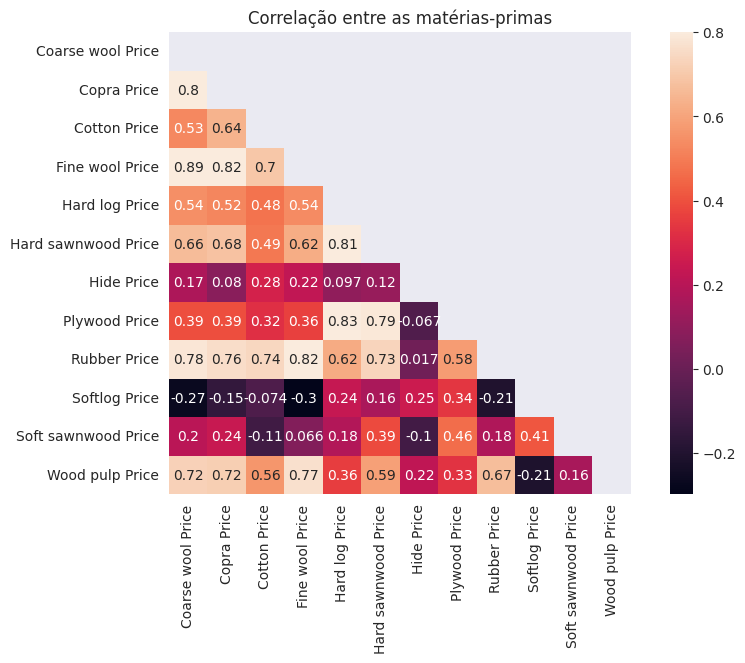

In [ ]:
# Correlação entre os preços das matérias-primas

# Define o estilo do seaborn
sns.set_style("dark")

# Lista de colunas a serem incluídas no heatmap
colunas_para_plotar = [col for col in dados.columns if "Month" != col and "%" not in col]

# Calcula a correlação entre as colunas selecionadas
corr = dados[colunas_para_plotar].corr()

# Plota o heatmap com a máscara
plt.figure(figsize=(10,6))
sns.heatmap(corr, vmax=.8, mask=np.triu(np.ones_like(corr, dtype=bool)),
            square=True, annot=True)
plt.title("Correlação entre as matérias-primas")
plt.show()

Plota um heatmap das correlações entre as colunas do DataFrame 'dados'.
    Exclui as colunas 'Month' e quaisquer colunas que contenham '%'.

- Nesse mapa mostra o preço das matérias primas, deixando de fora a variação percentual(ex:em maio o algodão caiu 10%, em abril subiu 5% - %change)

- É possivel entender se o preço de uma determinada matéria-prima está correlacionado com o preço de uma outra matéria-prima.

- Lã e algodão, se o preço da lã aumentar, o preço do algodão também aumenta?

- O mapa de calor mostra que quanto mais próximo de 1, maior a correlação entre as matérias-primas.

- A matéria-prima Fine wool é 0.89, ou seja ela tem uma correlação muito forte com a outra matéria-prima Coarse wool .

- A matéria-prima Plywood (price) tem uma correlação muito forte com a Hard long (price) com 0.83


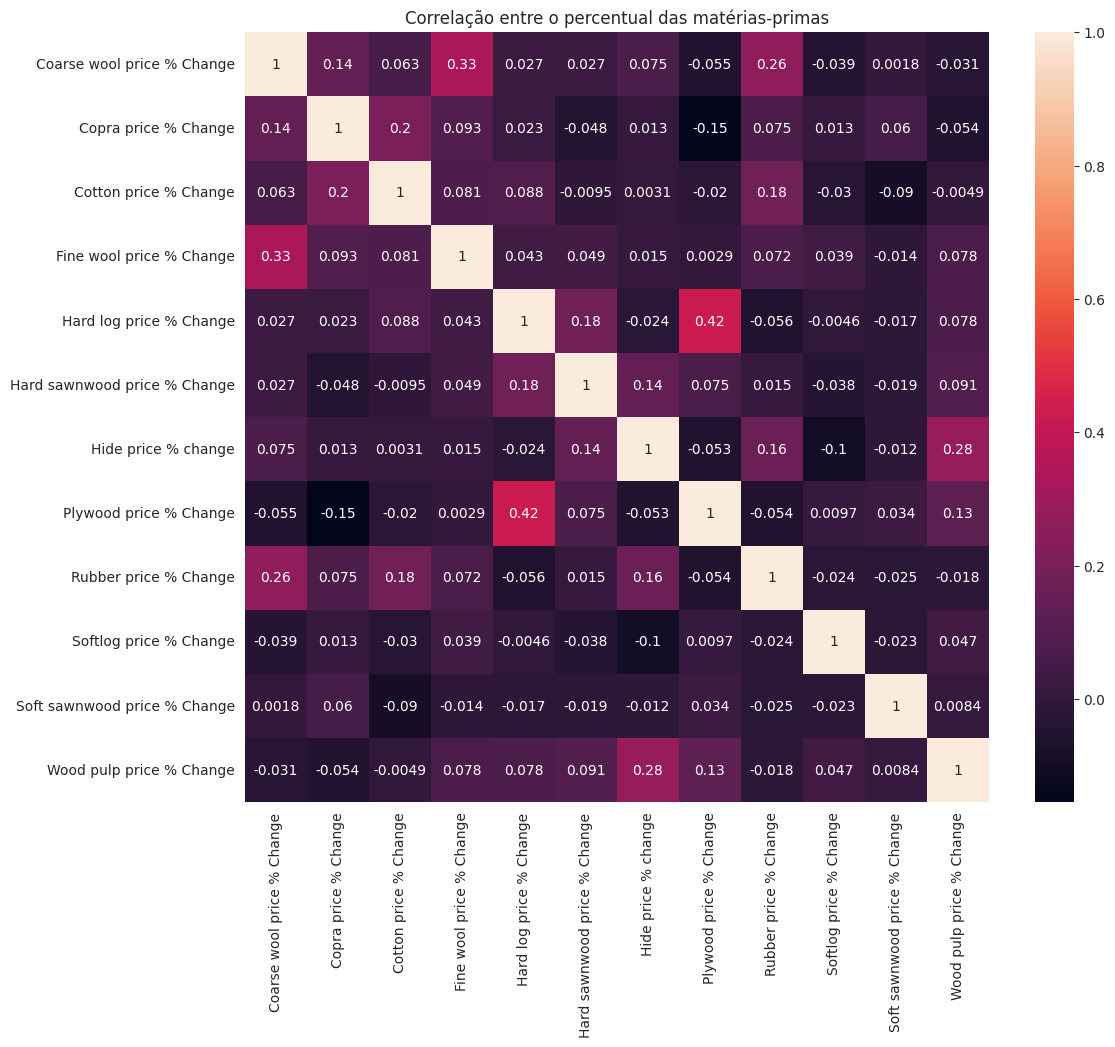

In [ ]:
# Correlação entre o percentual

plt.figure(figsize = (12,10))
percentual_colunas = [col for col in dados.columns if "Month" != col and "%" in col]

correlacao = dados[percentual_colunas].corr()

sns.heatmap(correlacao, annot=True)
plt.title("Correlação entre o percentual das matérias-primas")

plt.show()

- O mapa de calor mostra que não há uma correlação muito forte entre os percentuais das matérias-primas.

- O maior valor é de 0.42 da Plywoood com Hard Long e vice-versa, mas ainda sim é uma correlação fraca. Uma forte é acima de 0.7

- Os valores negativos informam que as colunas estão negativamente correlacionadas.

- Se o percentual do algodão cai, não puxa outra matéria prima, mas o preço pode influenciar.



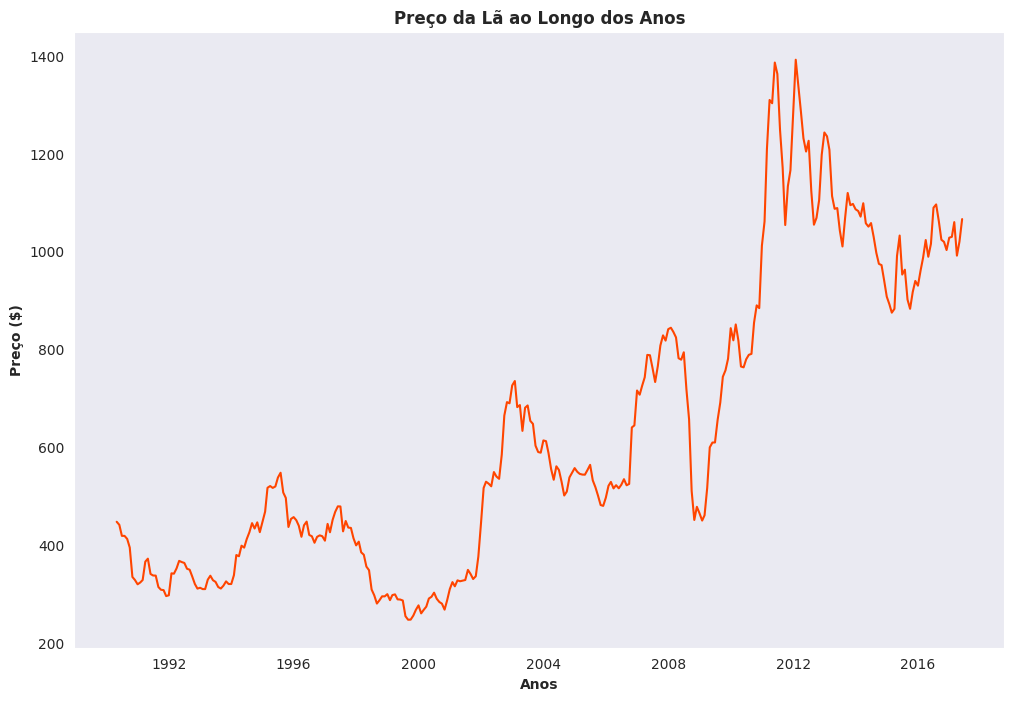

In [ ]:
# EDA da Lã

plt.figure(figsize=(12, 8))
plt.plot(dados["Coarse wool Price"], color="orangered")
plt.title("Preço da Lã ao Longo dos Anos",fontsize=12, fontweight="bold")
plt.xlabel("Anos", fontweight="bold")
plt.ylabel("Preço ($)", fontweight="bold")
plt.show()

- No gráfico de Coarse wool Price o preço vai de 200 a 1400 dólares. Teve um aumento com o passar dos anos.
- Houve uma queda brusca nos anos 2000.
- Pode-se ver a evolução do preço da matéria-prima lã com o passar dos anos

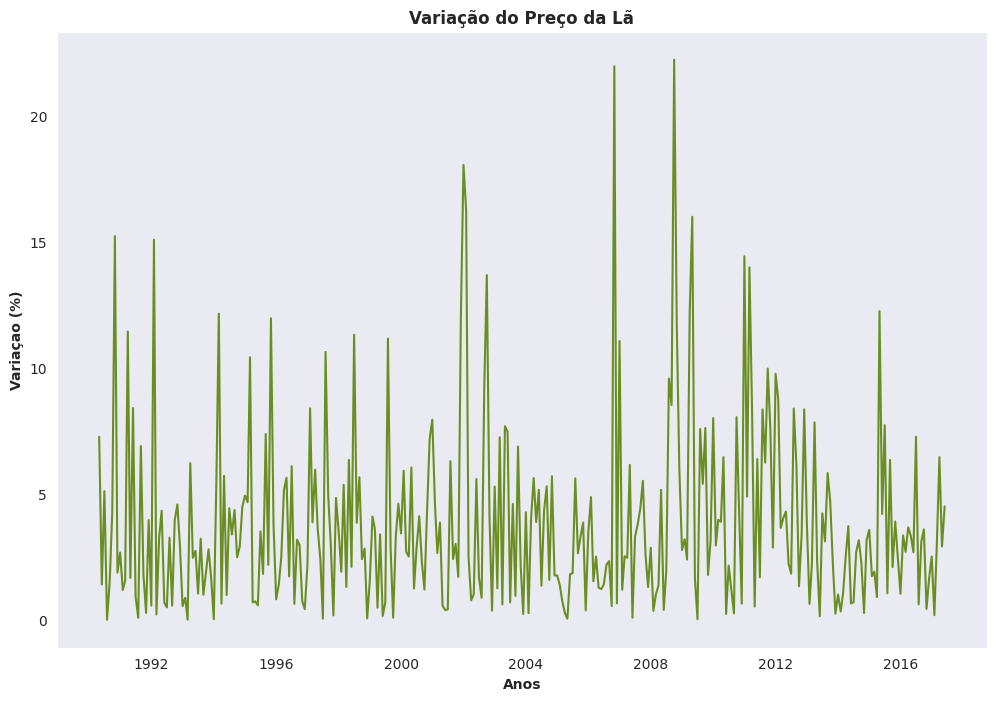

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(dados["Coarse wool price % Change"], color="olivedrab")
plt.title("Variação do Preço da Lã",fontsize=12, fontweight="bold")
plt.xlabel("Anos", fontweight="bold")
plt.ylabel("Variaçao (%)", fontweight="bold")
plt.show()

- No % charge, há aumentos e quedas, porém, os aumentos são muito maiores.

### Análise de Insights através de pergungas

**1. Qual a variação normal do preço de cada matéria-prima?**

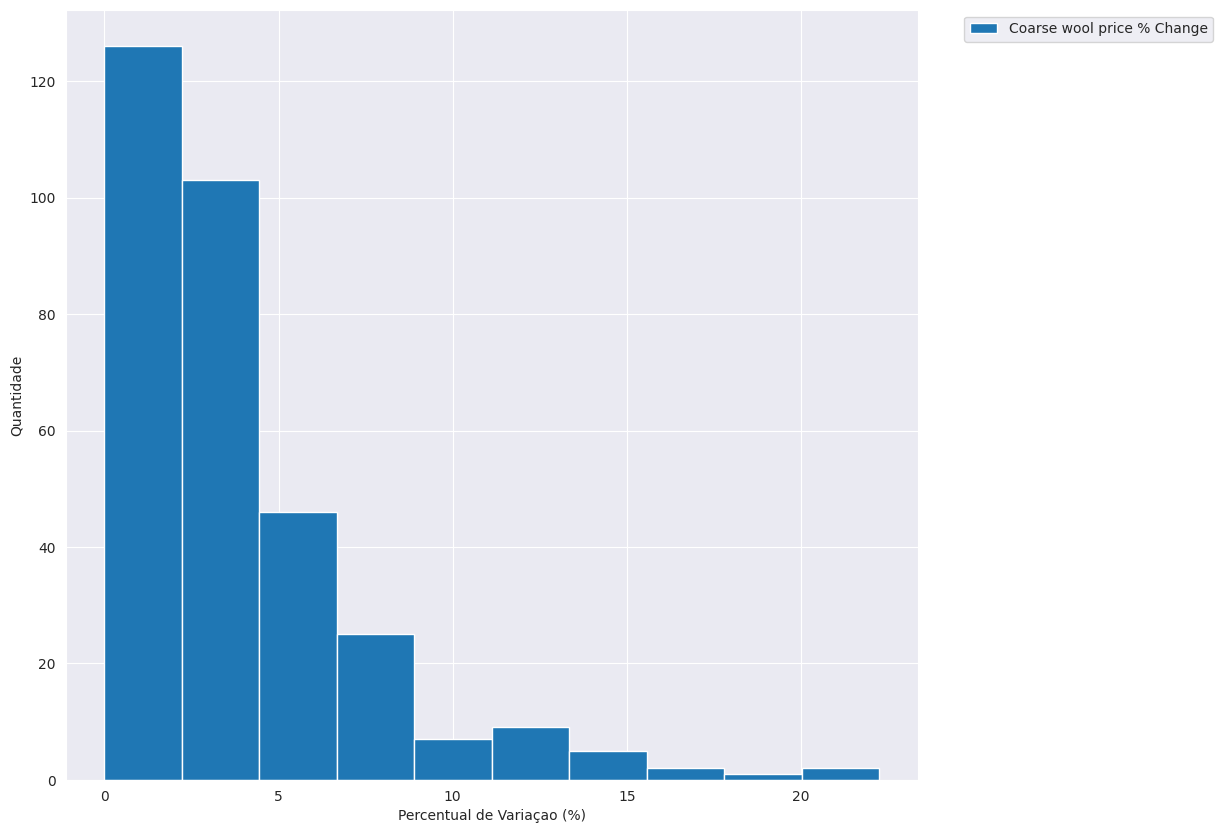

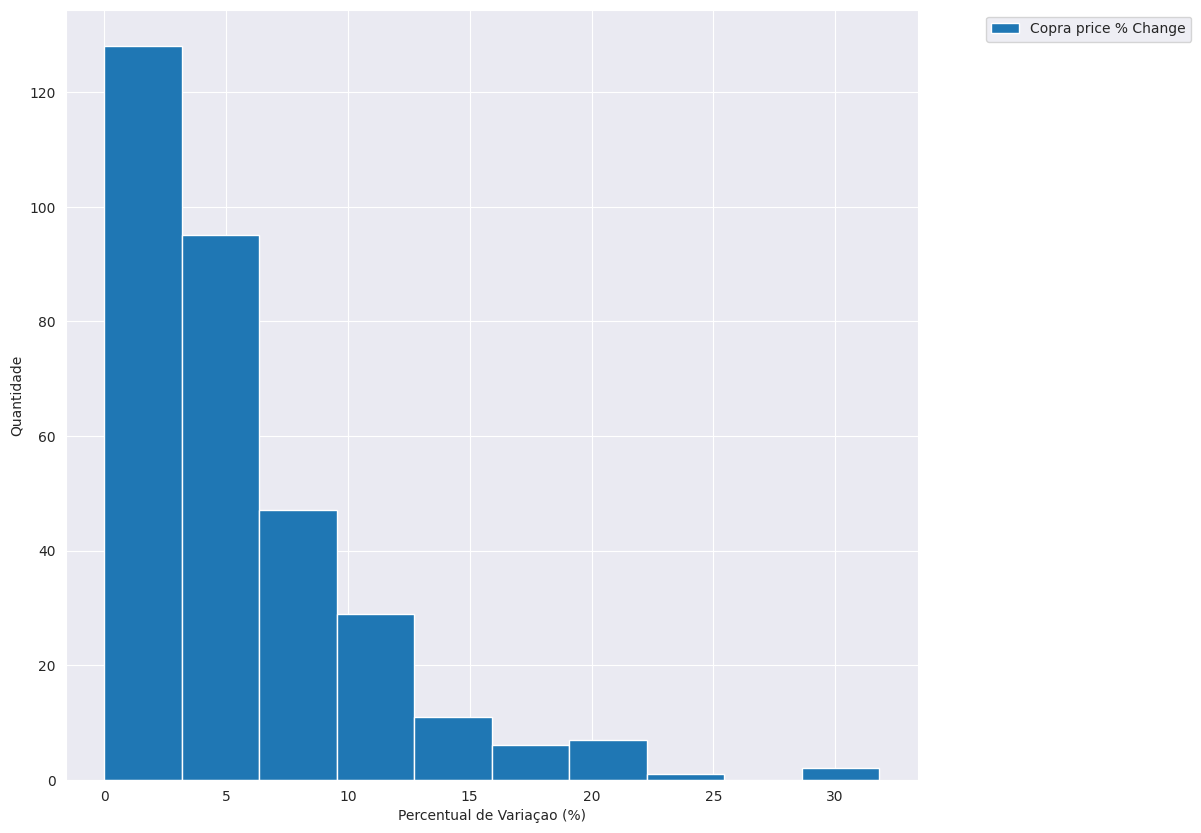

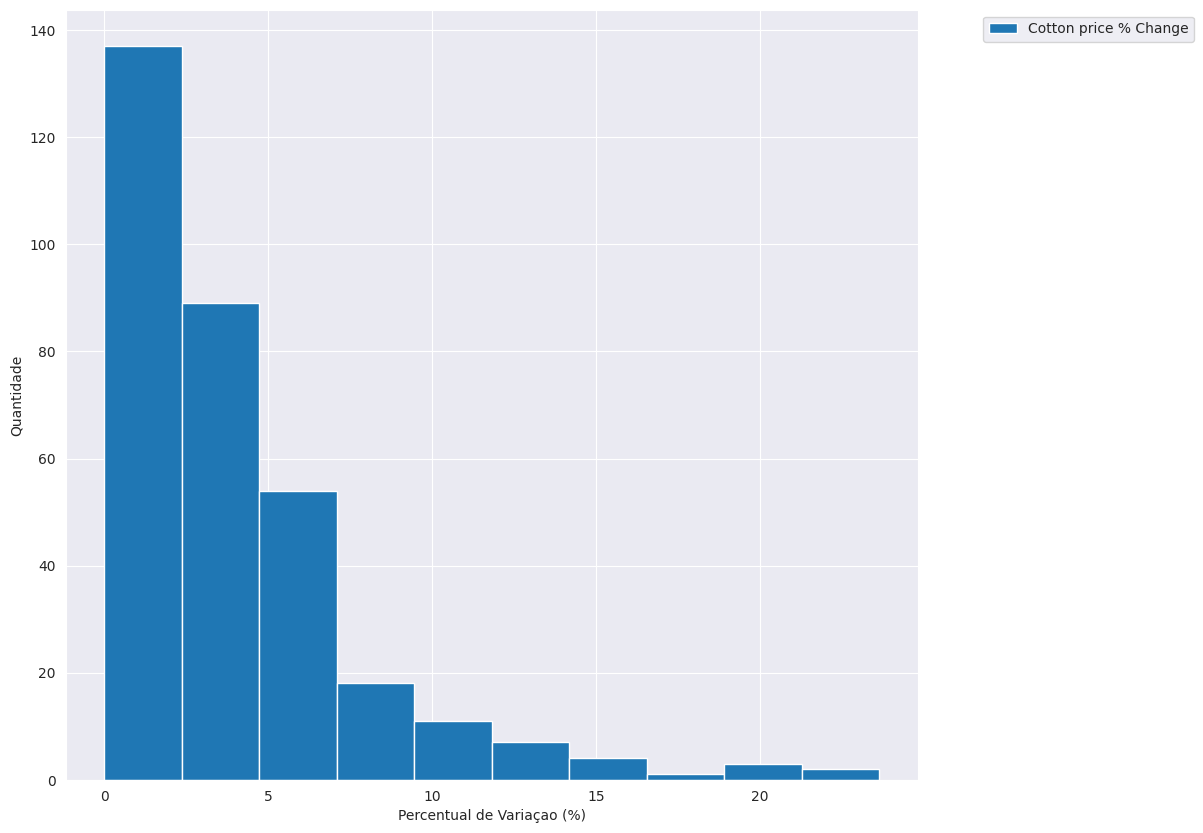

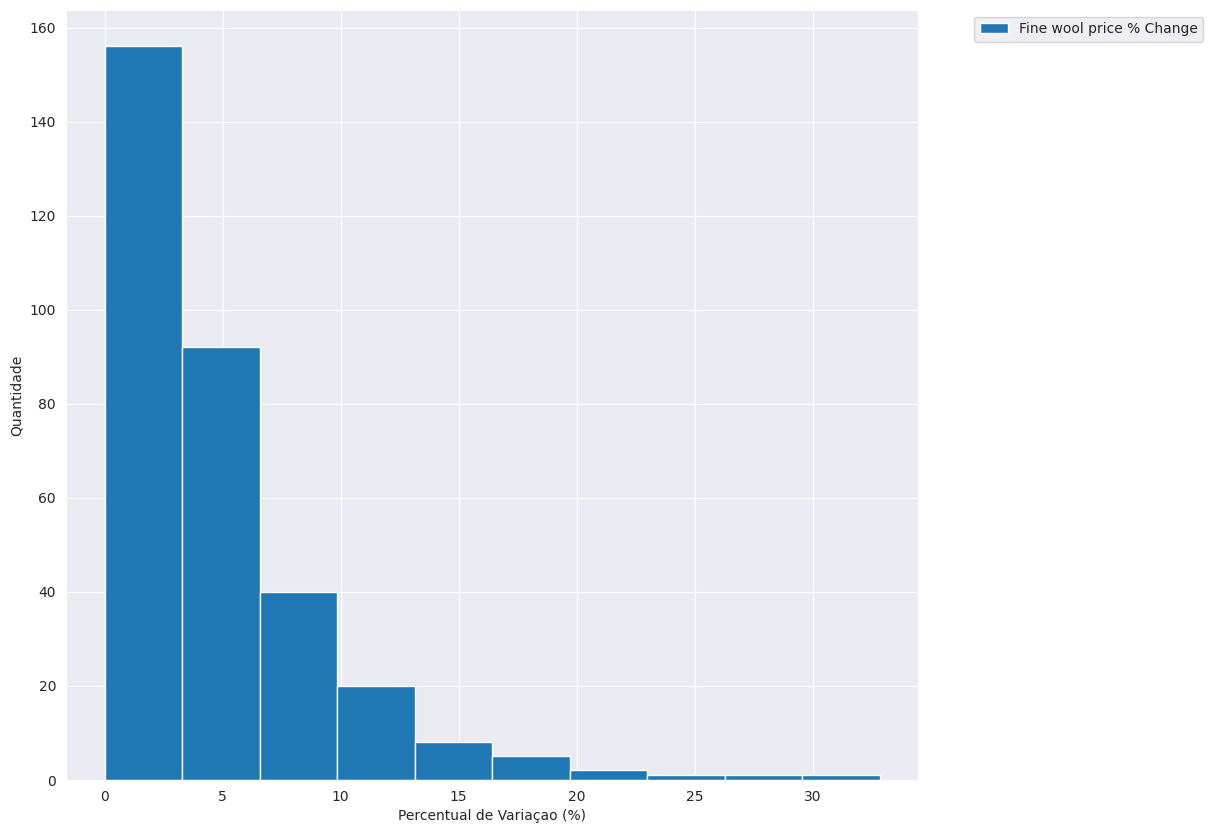

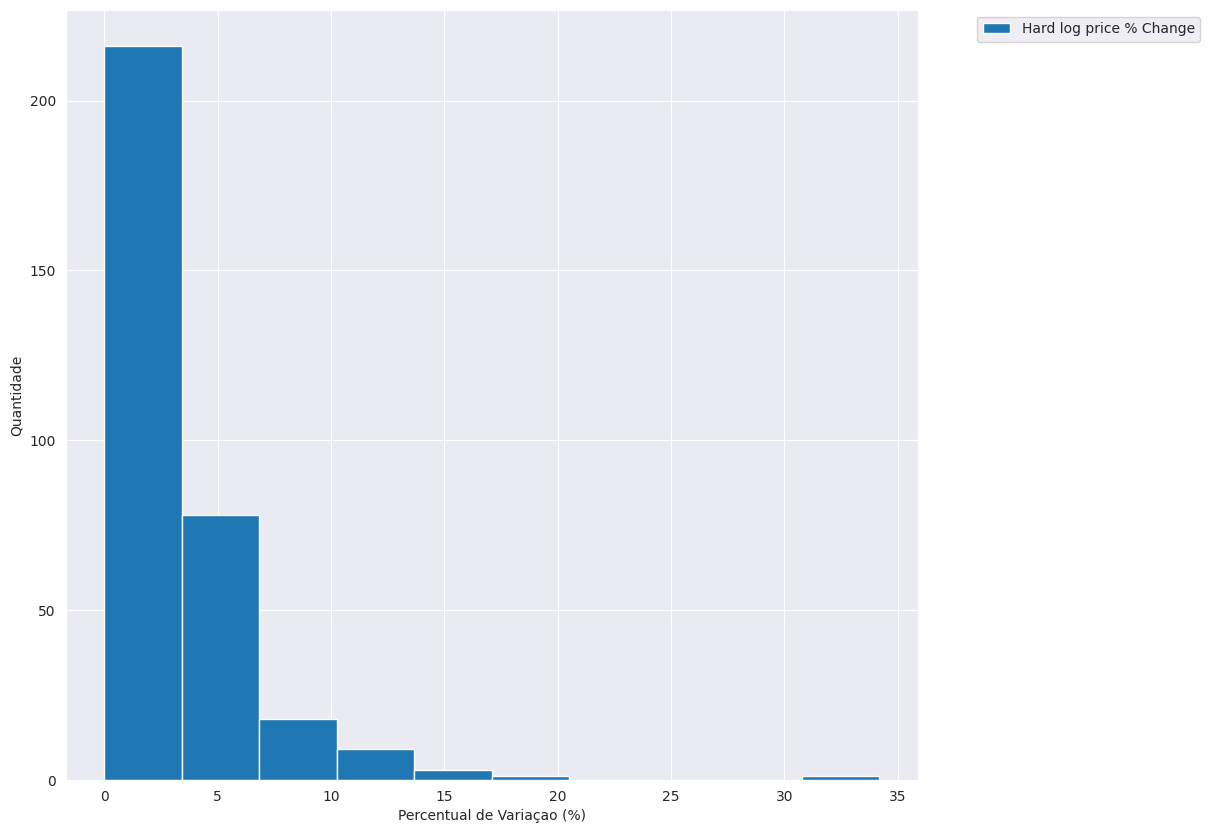

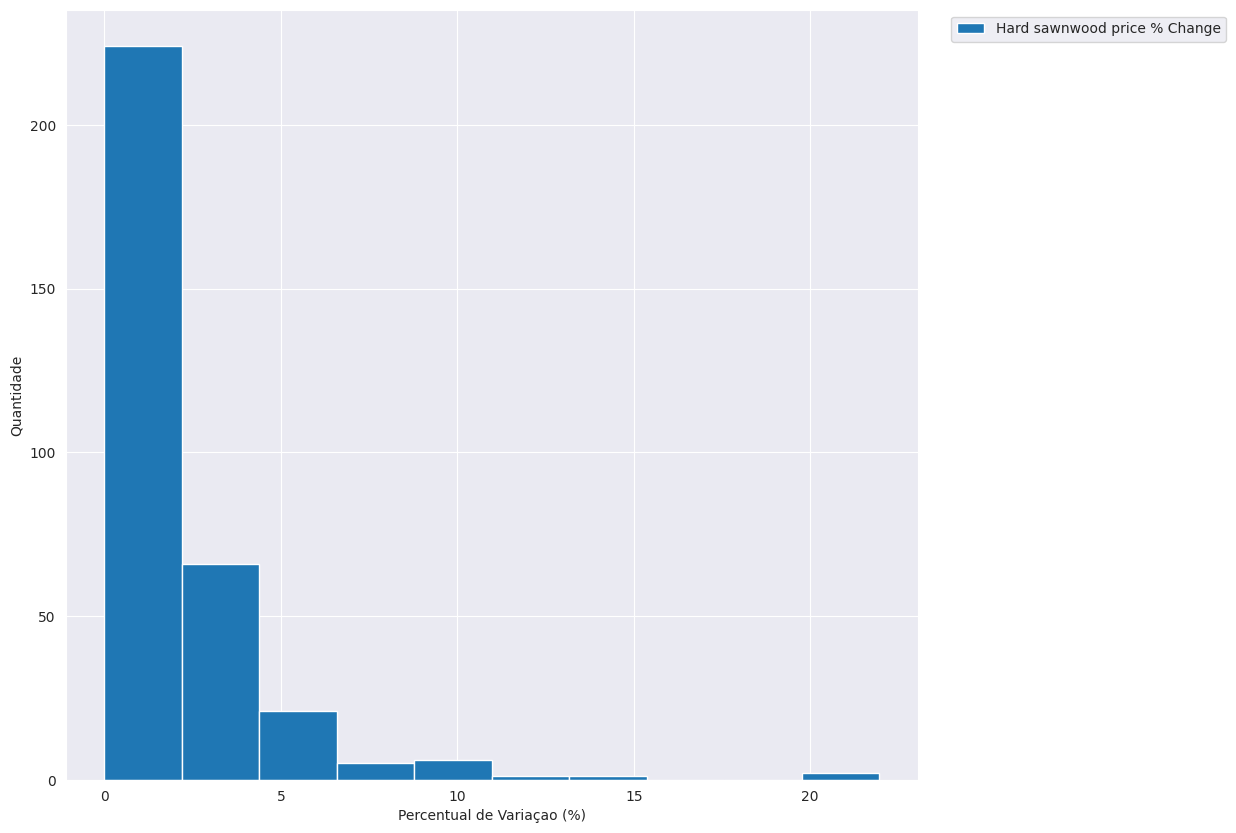

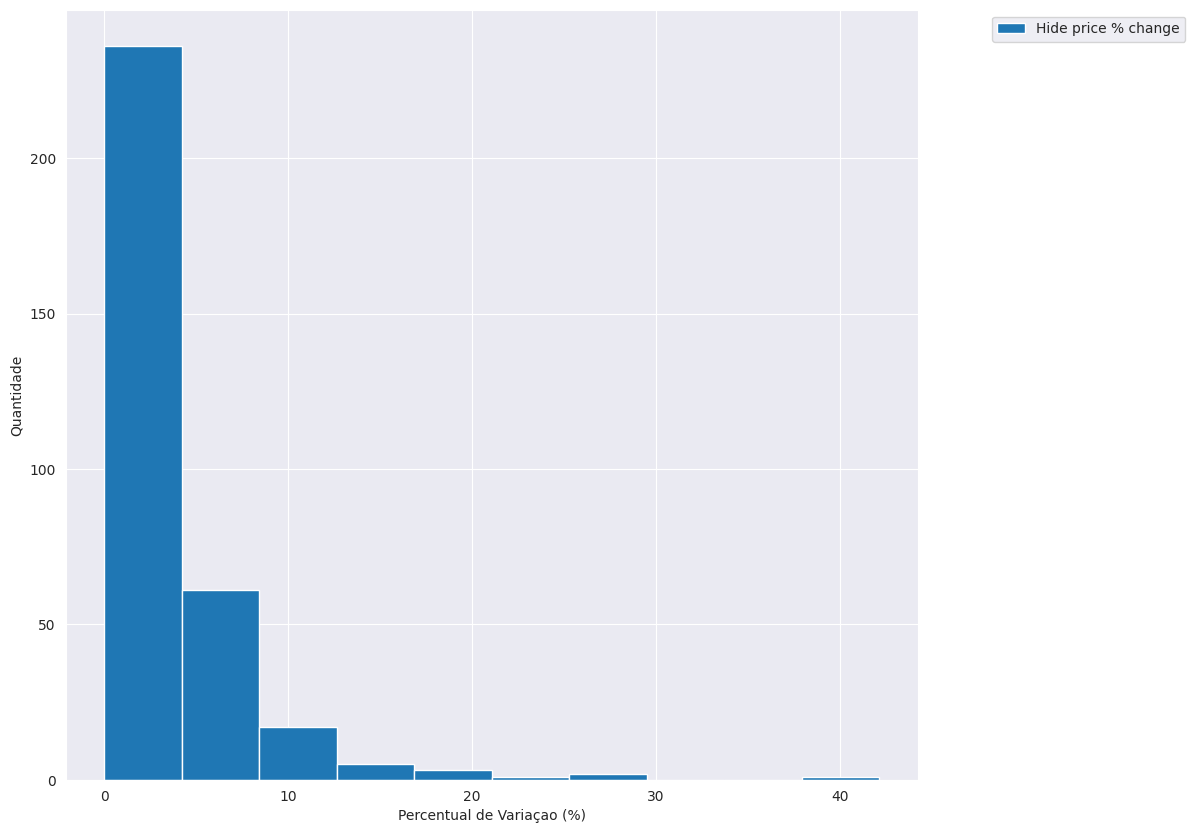

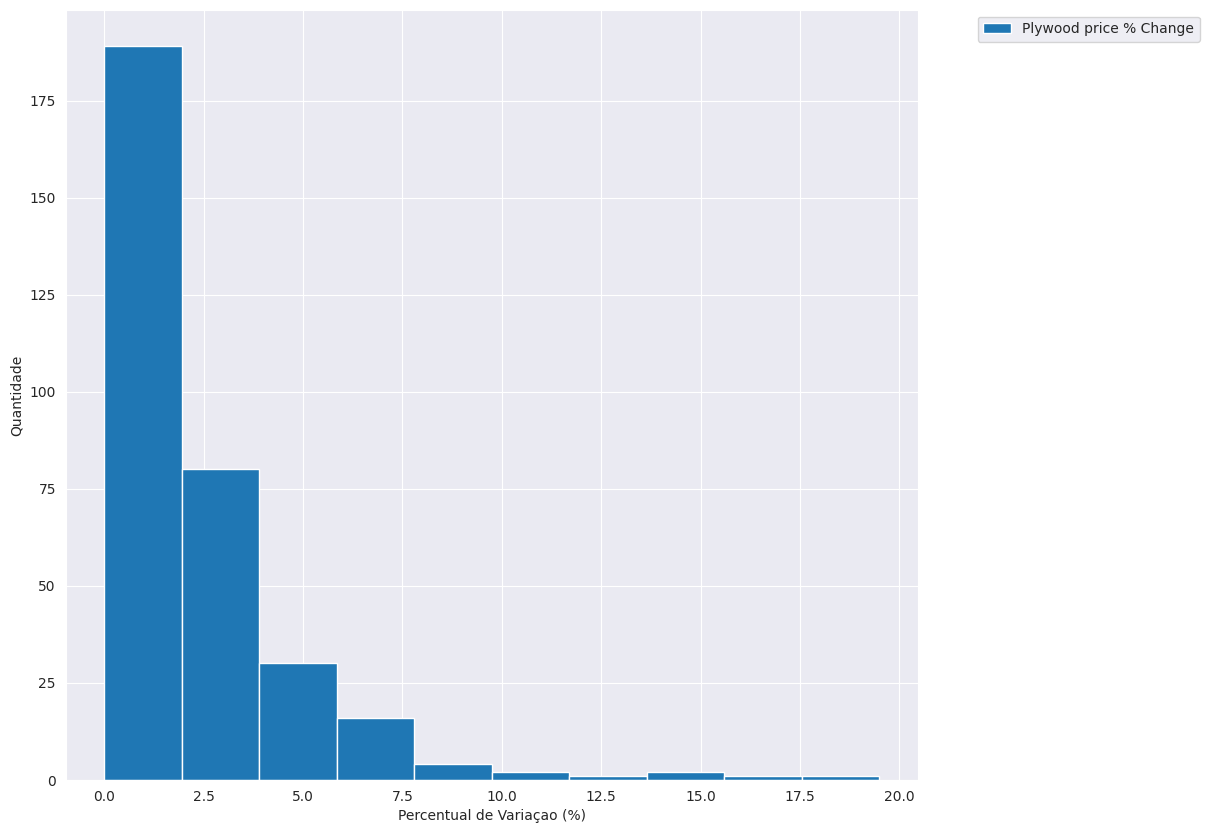

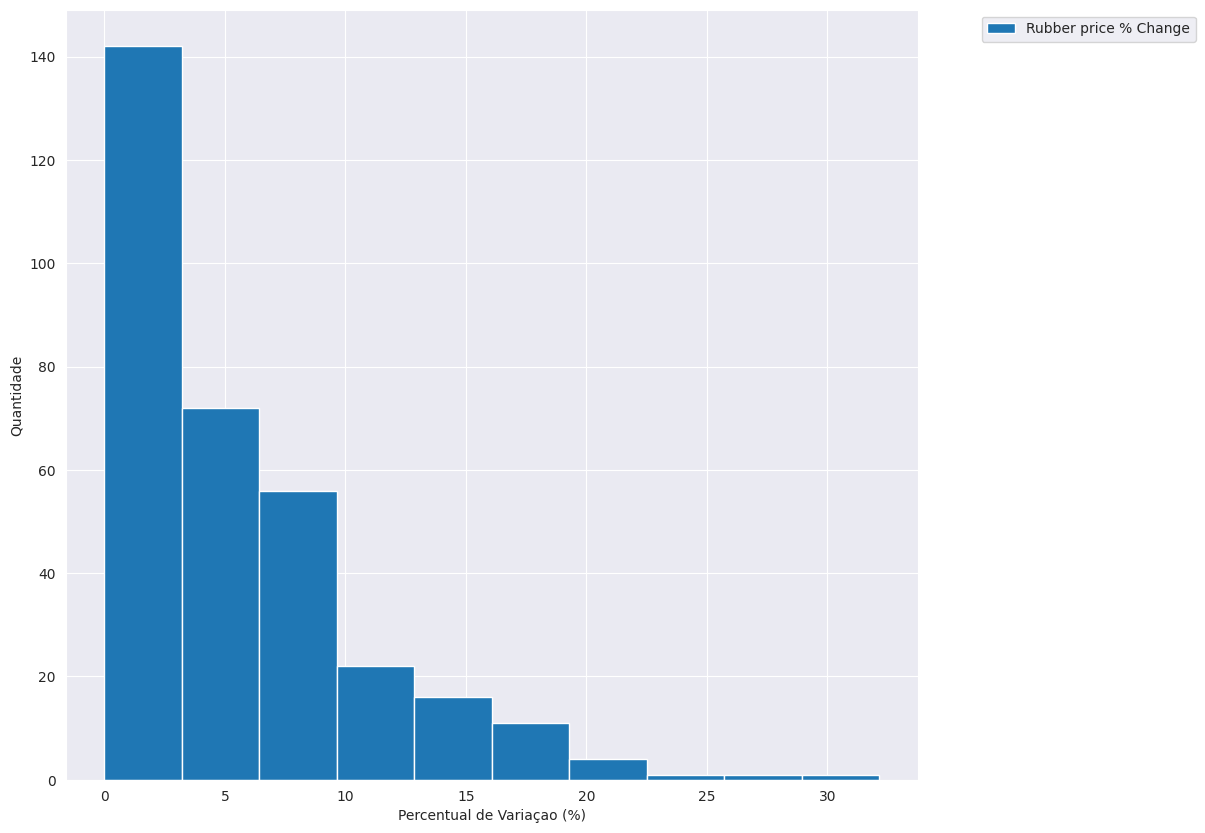

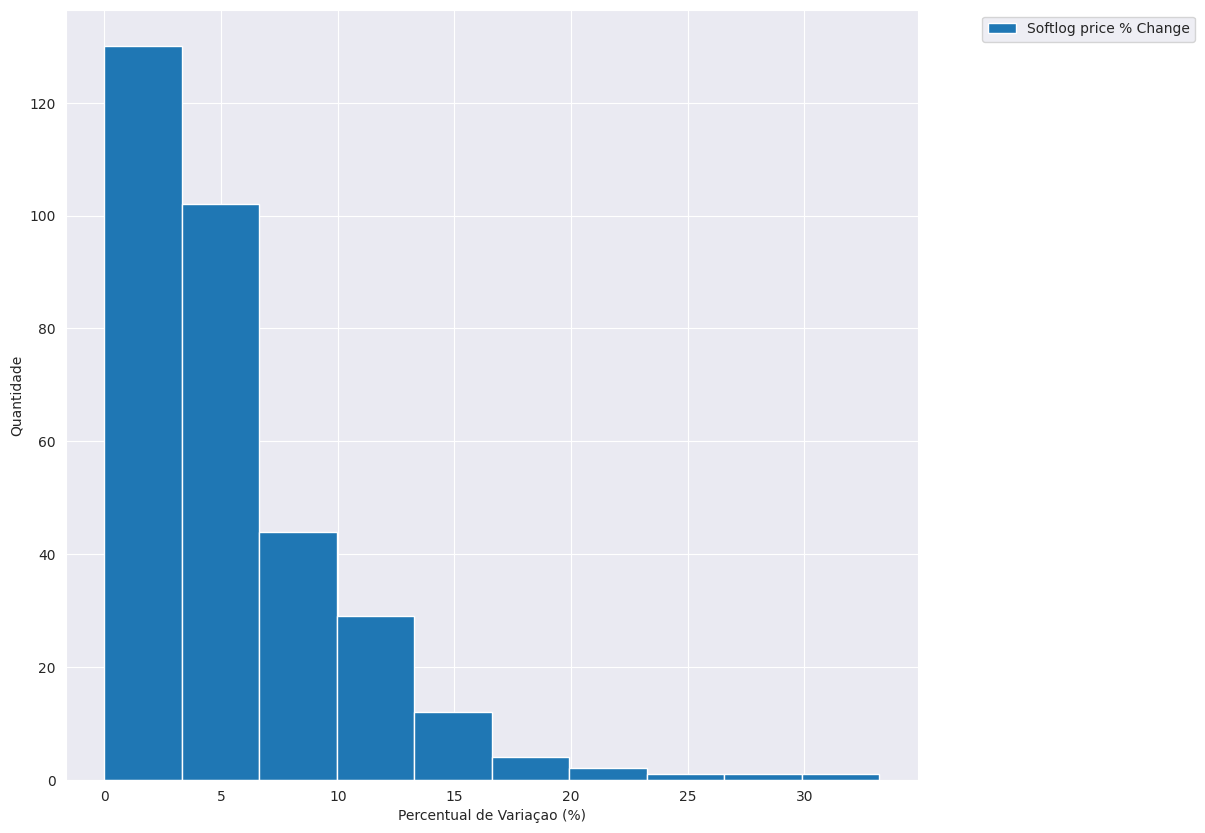

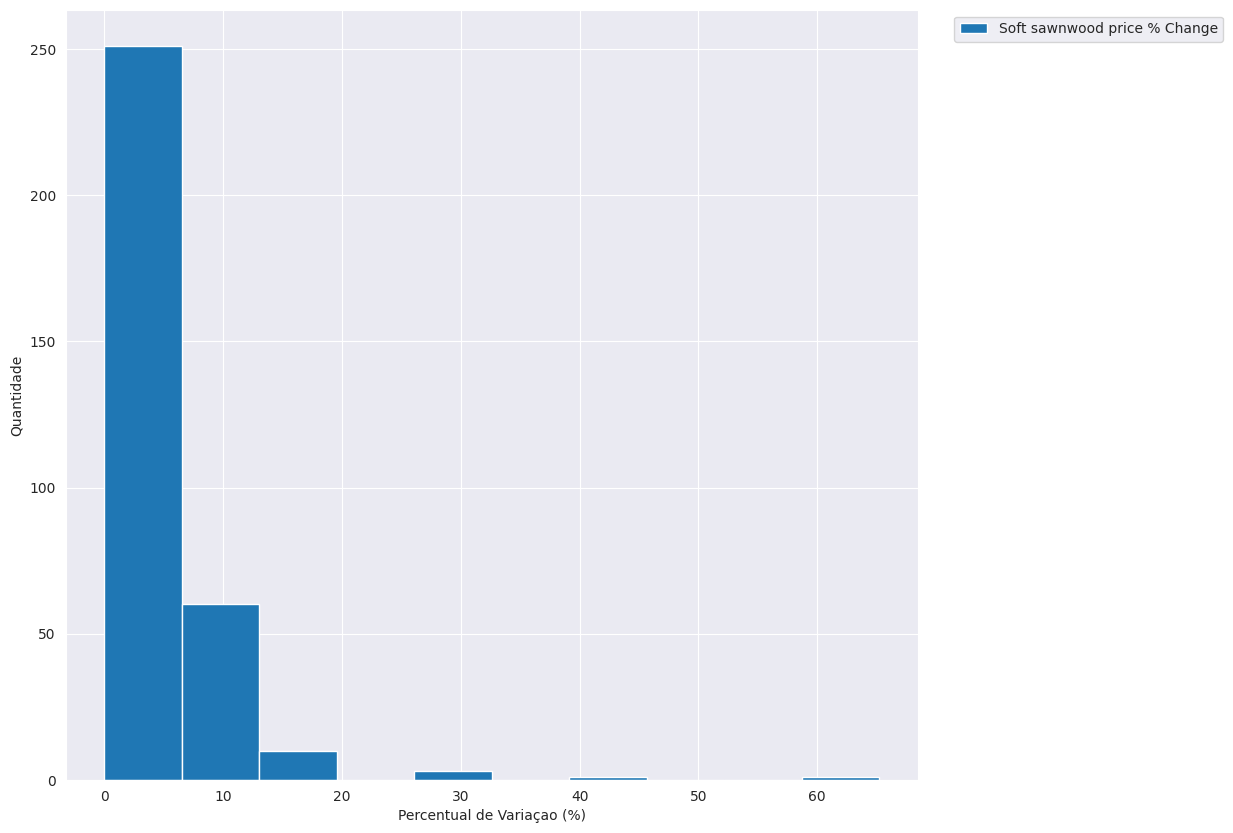

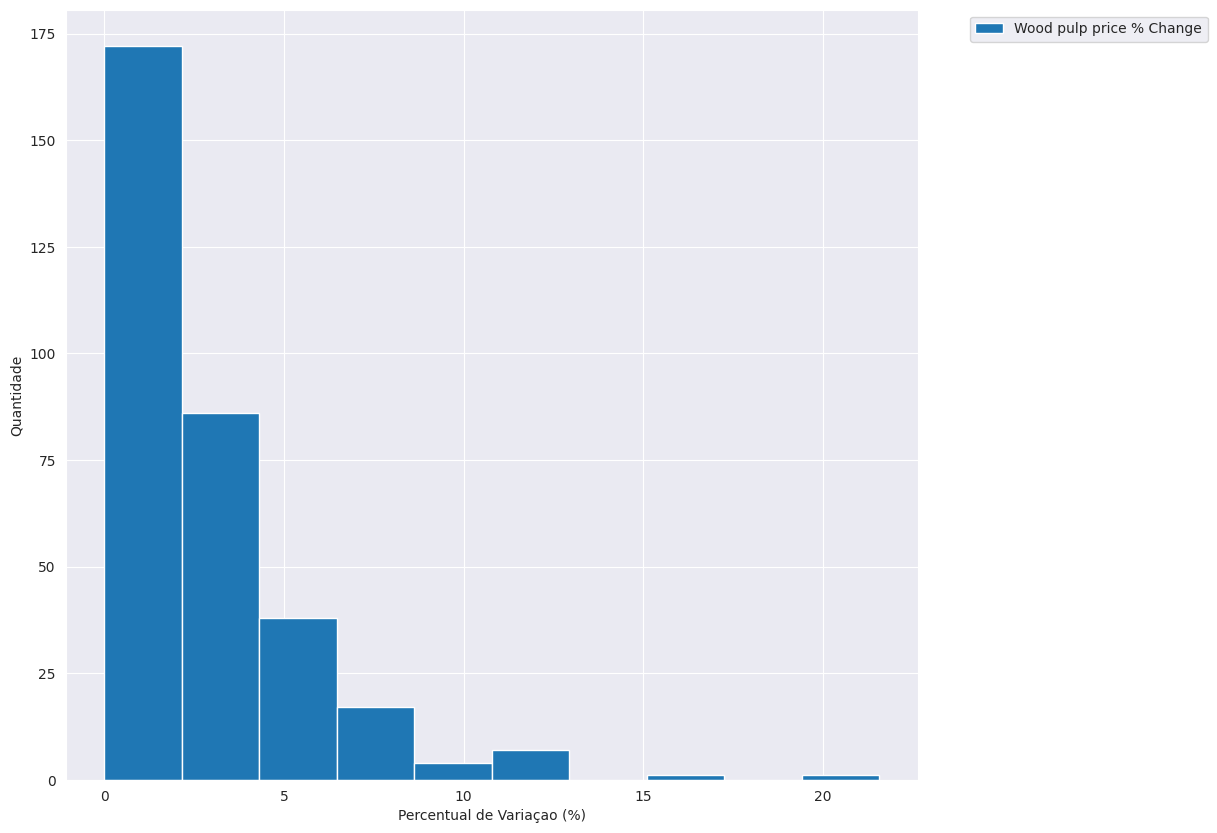

In [ ]:
for col in dados.columns:
    if "%" in col:
      plt.figure(figsize=(12,12))
      dados[col].hist(figsize=(11,10), linewidth=1)
      plt.xlabel("Percentual de Variaçao (%)")
      plt.ylabel("Quantidade")
      plt.legend([col], loc="upper center", bbox_to_anchor=(1.2,1))
      plt.show()


- A maioria das matérias-primas tiveram a maior variação de preço entre 0 e 5 %.
- Caso fosse necessário fazer um investimento, e comprar matéria-prima sem sofrer muita variação de preço. Pode-se comprar as que sofreram menos variação do que as mais volateis.


**2. Qual a matéria-prima que teve o menor preço ao longo dos anos?**

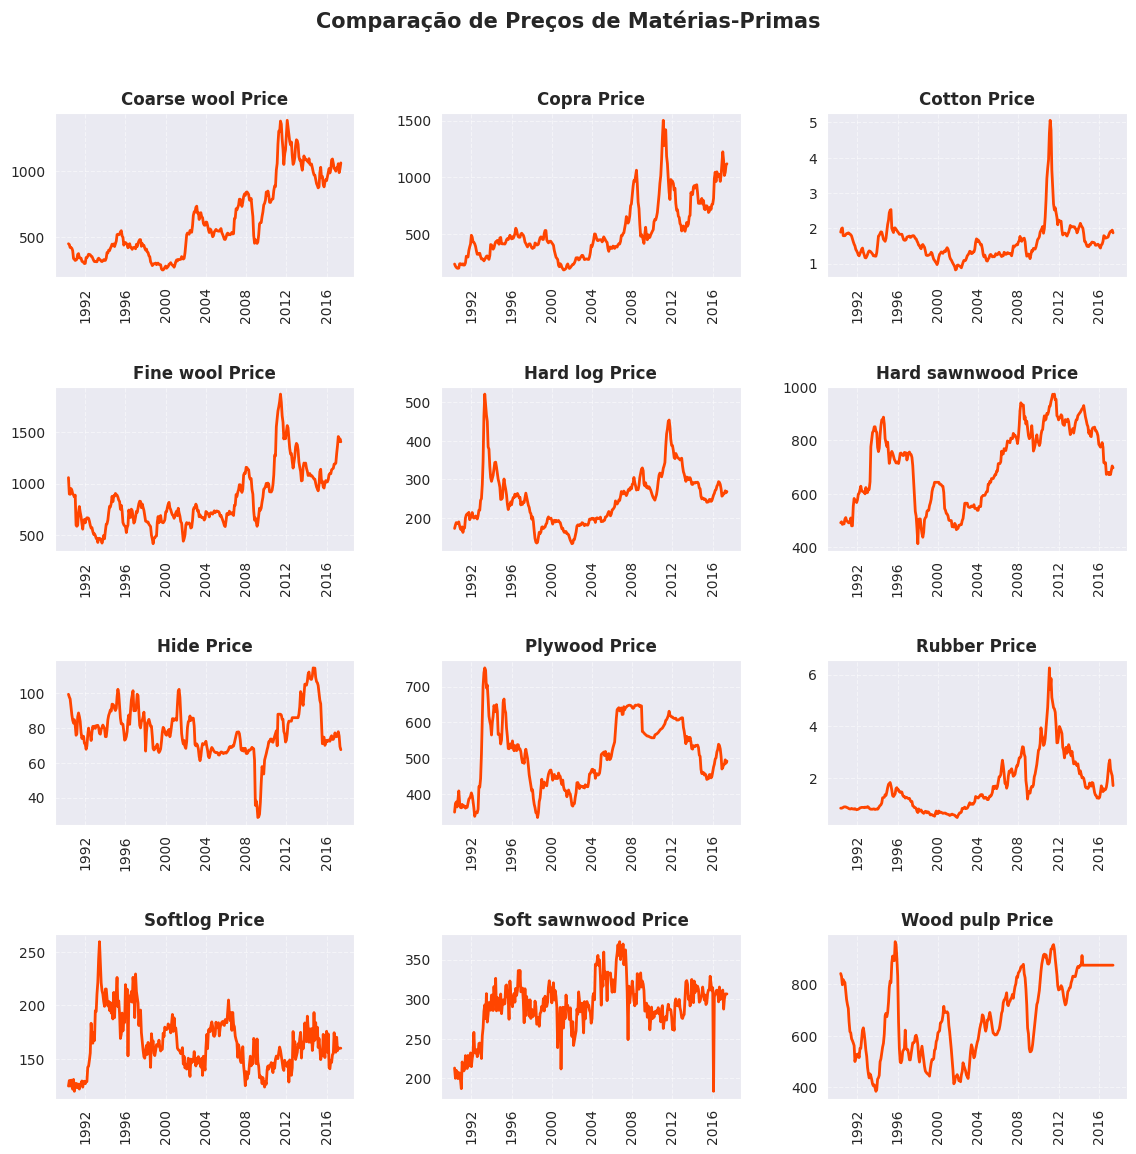

In [ ]:
# Lista de materiais (colunas sem percentagem)
materials = [col for col in dados.columns if "%" not in col]

# Configuração do gráfico
plt.figure(figsize=(12, 12))
for i, material in enumerate(materials):
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(hspace=4, wspace=2)
    plt.title(material, fontsize=12, fontweight="bold")  # Ajuste do tamanho e peso da fonte do título
    plt.plot(dados[material], color="orangered", linewidth=2)
    plt.xticks(rotation=90)
    plt.grid(True, linestyle="--", alpha=0.5)  # Adição de uma grade com estilo pontilhado e transparência

plt.suptitle("Comparação de Preços de Matérias-Primas", fontweight="bold", fontsize=15)  # Ajuste do tamanho e peso da fonte do título principal
plt.tight_layout(pad=3.0)  # Adicionando espaço entre o título principal e o gráfico
plt.show()


As matérias-primas com o menor preço ao longo dos anos são Cotton Price e Rubber Price com preços entre 1 e 6 dólares. Sendo que o maior valor foi no ano de 2012.
Ou seja, o algodão e a borracha estão com os preços mais baixos ao longo do tempo. E foram os que menos sofreram variação.


<Figure size 1200x1200 with 0 Axes>

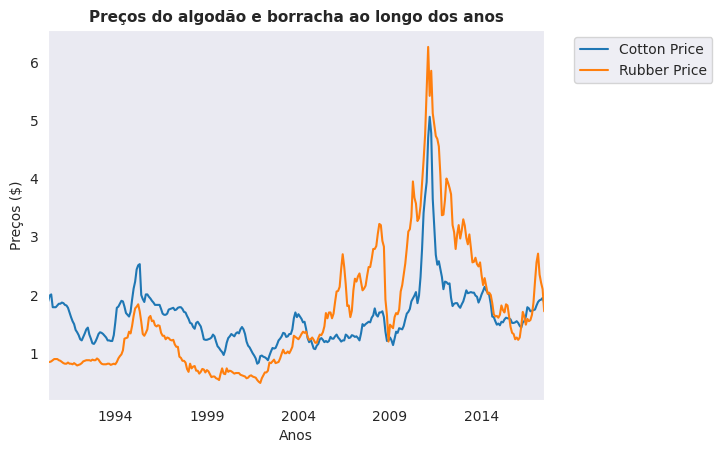

In [ ]:
plt.figure(figsize=(12,12))
dados[["Cotton Price", "Rubber Price"]].plot()
plt.title("Preços do algodão e borracha ao longo dos anos", fontsize=11, fontweight="bold")
plt.xlabel("Anos")
plt.ylabel("Preços ($)")
plt.legend(["Cotton Price", "Rubber Price"], loc="upper center", bbox_to_anchor=(1.2,1))

A borracha está com o preço maior que o algodão, pois ela teve um aumento maior em 2012.
Sendo assim, **a matéria-prima de menor preço ao longo dos anos é o algodão**. Porém, ambos estão com preço baixo.

**3. Qual a matéria-prima que teve o maior preço ao longo dos anos?**

<Figure size 1200x1200 with 0 Axes>

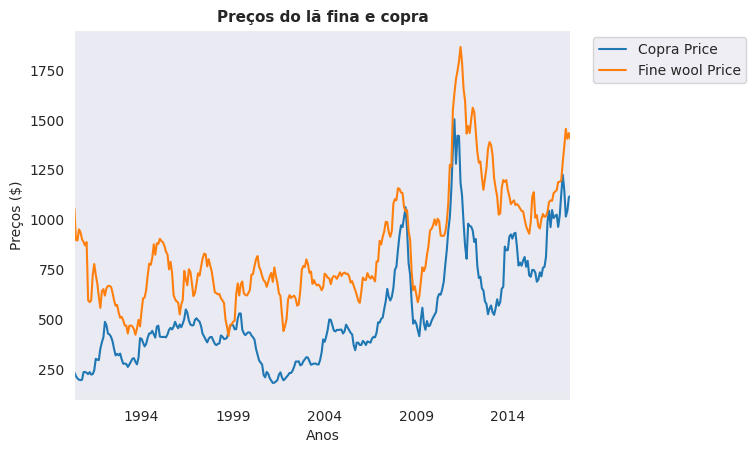

In [ ]:
plt.figure(figsize=(12,12))
dados[["Copra Price", "Fine wool Price"]].plot()
plt.title("Preços do lã fina e copra", fontsize=11, fontweight="bold")
plt.xlabel("Anos")
plt.ylabel("Preços ($)")
plt.legend(["Copra Price", "Fine wool Price"], loc="upper center", bbox_to_anchor=(1.2,1))

**A matéria-prima com maior preço ao longo dos anos foi a lã fina**, com preço acima de 1750 dólares, seguida pelo preço da Copra(polpa oleaginosa da amêndoa do coco-da-baía) com valor de 1500 dólares.

**4: Qual matéria-prima teve o maior e menor percentual de variação de preço?**

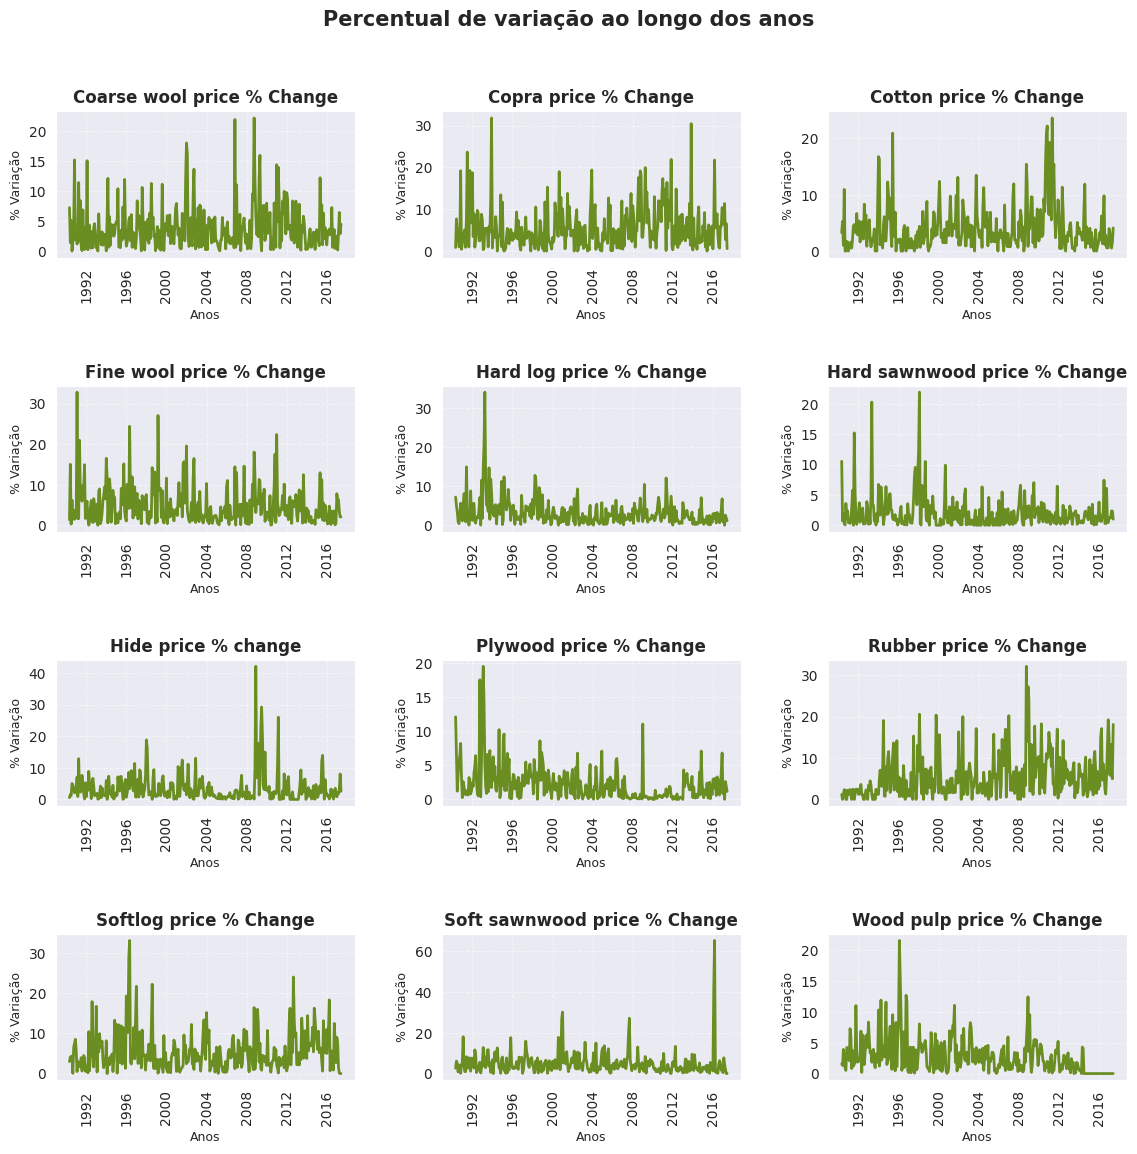

In [ ]:
change = [col for col in dados.columns if "%" in col]

plt.figure(figsize=(12,12))
for i in range(len(change)):
  plt.subplot(4, 3, i+1)
  plt.subplots_adjust(hspace=4, wspace=2)
  plt.title(change[i], fontsize=12, fontweight="bold")
  plt.plot(dados[change[i]], color="olivedrab", linewidth=2)
  plt.xticks(rotation=90)
  plt.xlabel("Anos", fontsize=9)
  plt.ylabel("% Variação", fontsize=9)
  plt.grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Percentual de variação ao longo dos anos", fontweight="bold", fontsize=15)
plt.tight_layout(pad=3.0)
plt.show()

A madeira serrada é a matéria-prima com maior percentual de variação, atingindo mais de 60%. E a menor variação é da madeira compensada com menor de 20%
